# KANADA EV FİYATLARI TAHMİN MODELLERİ

## VERİ ÖN İŞLEME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CanadianHousePrices.csv", encoding = "latin-1")

In [3]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [4]:
df.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


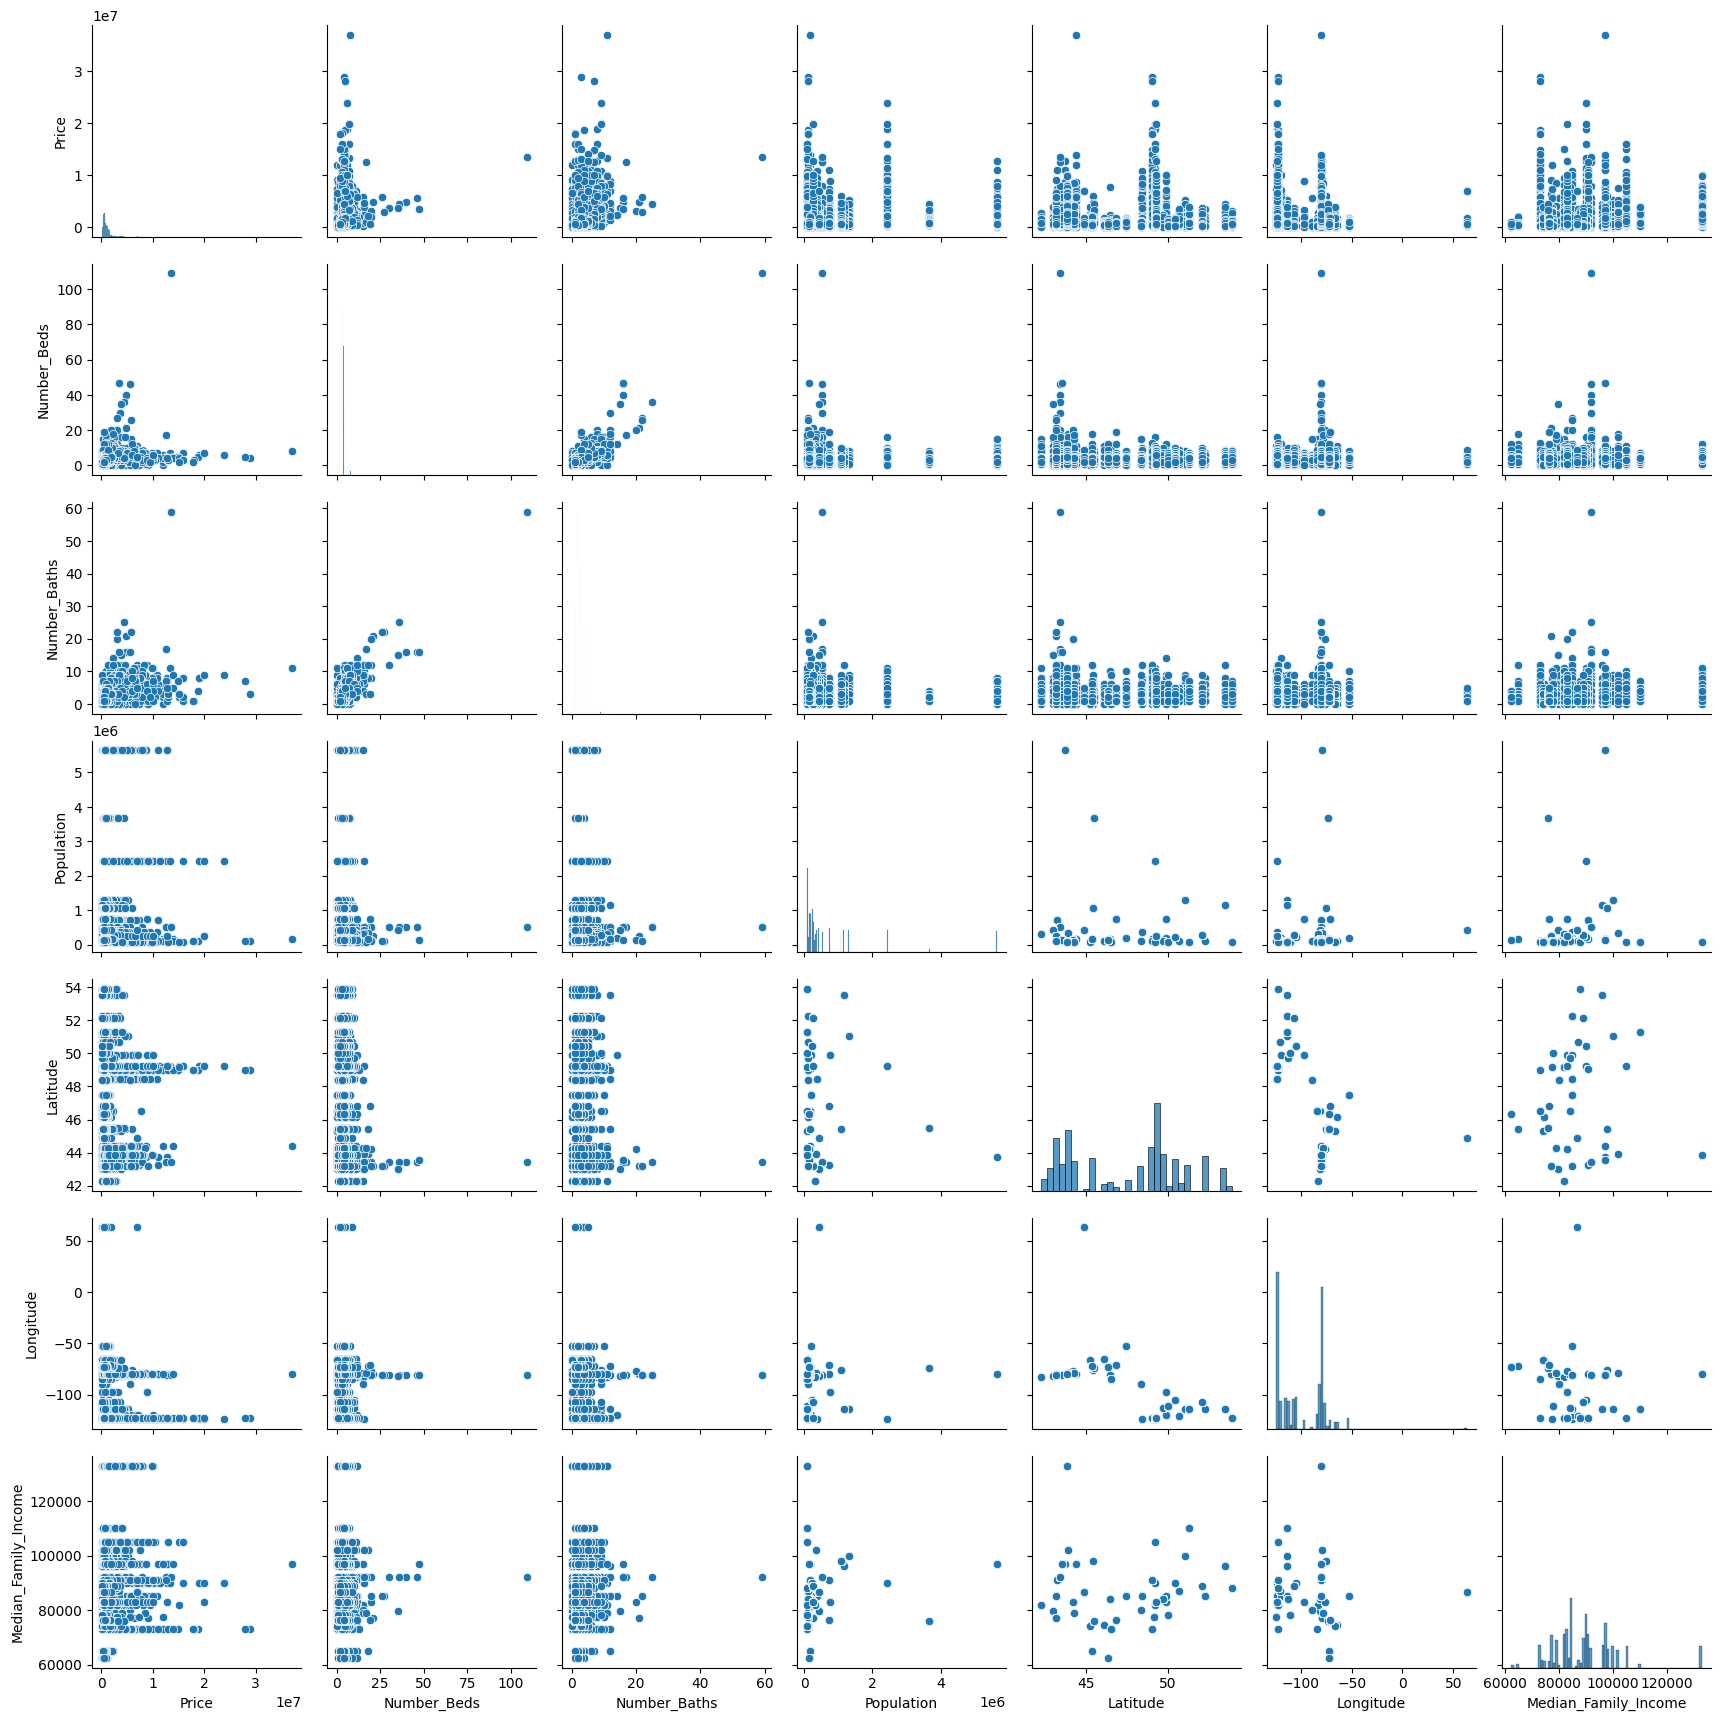

In [6]:
sns.pairplot(df)

In [7]:
df["Address"].nunique()

31379

In [8]:
df.duplicated().sum()

2516

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df["Address"].nunique()

31379

In [11]:
df["City"].nunique()

45

In [12]:
df["City"].value_counts()

City
Edmonton            1350
Caledon             1331
New Westminster     1323
Victoria            1321
Burnaby             1314
London              1311
Calgary             1303
Vancouver           1302
Kelowna             1279
Maple Ridge         1278
Toronto             1274
Hamilton            1266
St. Catharines      1259
White Rock          1172
Kitchener           1161
Ottawa              1093
Oshawa              1079
Barrie              1000
Regina               977
Saskatoon            921
Abbotsford           750
Windsor              718
Nanaimo              679
St. John's           652
Brantford            617
Winnipeg             524
Kingston             471
Kamloops             441
Guelph               434
Moncton              414
Lethbridge           378
Red Deer             325
Peterborough         305
Prince George        304
Medicine Hat         277
Saint John           229
Airdrie              225
Sudbury              202
Quebec               196
Montreal            

<Axes: xlabel='City', ylabel='Count'>

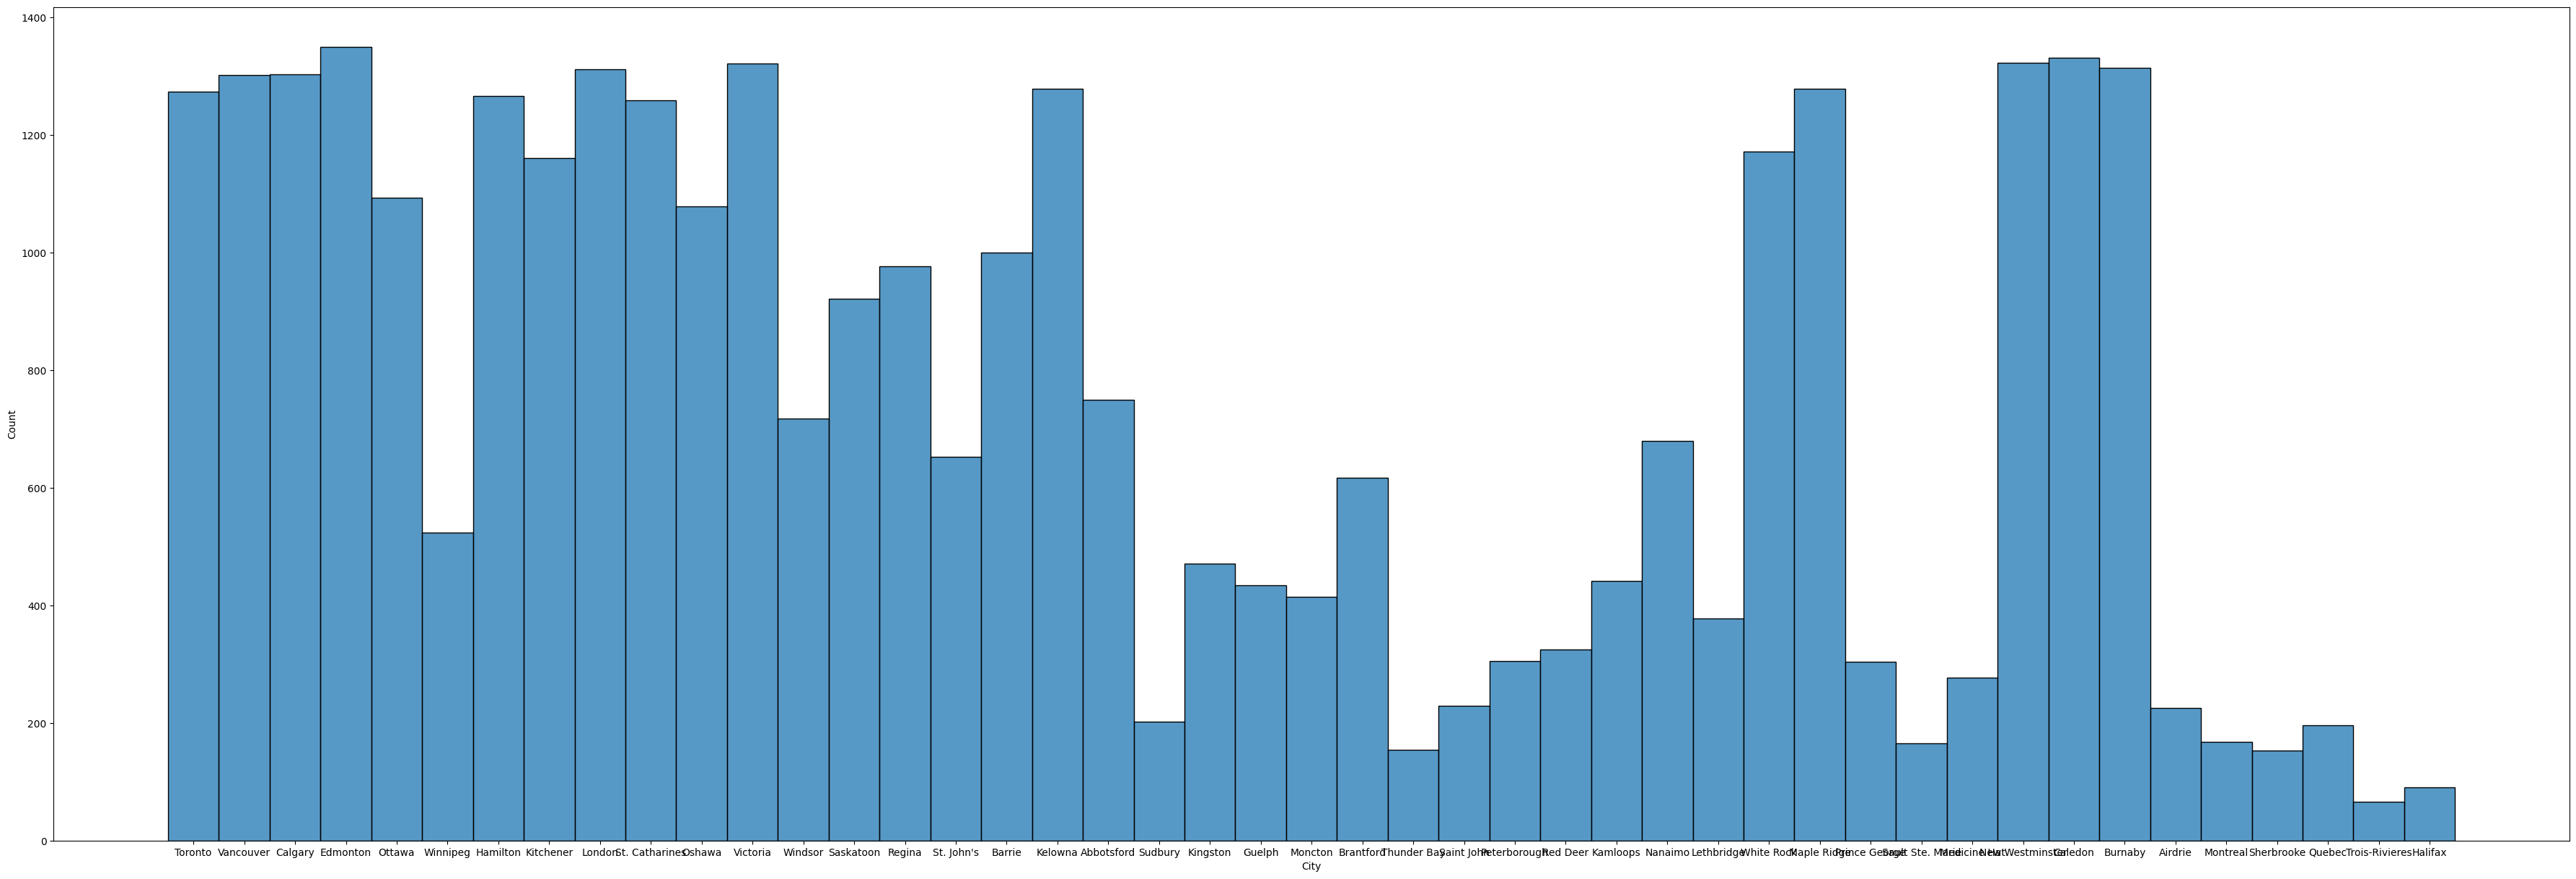

In [13]:
plt.figure(figsize=(45,15))
sns.histplot(df["City"], bins = 60)

In [14]:
df["Latitude"].nunique()

45

In [15]:
df["Longitude"].nunique()

44

In [16]:
df.drop(['Address','Latitude','Longitude'],axis=1,inplace=True)


In [17]:
df

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
0,Toronto,779900.0,3,2,Ontario,5647656,97000.0
1,Toronto,799999.0,3,1,Ontario,5647656,97000.0
2,Toronto,799900.0,2,2,Ontario,5647656,97000.0
3,Toronto,1200000.0,4,2,Ontario,5647656,97000.0
4,Toronto,668800.0,1,1,Ontario,5647656,97000.0
...,...,...,...,...,...,...,...
35763,Halifax,439900.0,2,2,Nova Scotia,431479,86753.0
35764,Halifax,6990000.0,5,5,Nova Scotia,431479,86753.0
35765,Halifax,419900.0,2,2,Nova Scotia,431479,86753.0
35766,Halifax,949900.0,3,1,Nova Scotia,431479,86753.0


In [18]:
df["Number_Beds"].nunique()

31

In [19]:
df["Number_Beds"].value_counts()

Number_Beds
3      9323
4      7323
2      7225
5      3733
1      2617
6      1487
0       625
7       495
8       240
9        91
10       32
11       17
12       13
15        6
16        5
20        3
17        2
18        2
21        1
13        1
26        1
27        1
47        1
40        1
35        1
109       1
46        1
14        1
36        1
30        1
19        1
Name: count, dtype: int64

(0.0, 20.0)

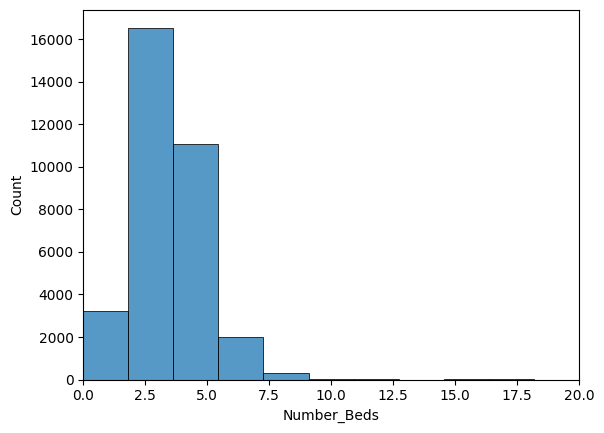

In [20]:
sns.histplot(df["Number_Beds"], bins = 60)
plt.xlim(0, 20)

<Axes: xlabel='Number_Beds'>

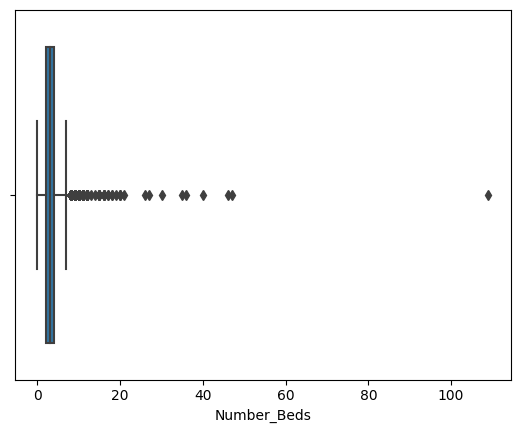

In [21]:
sns.boxplot(data = df, x = "Number_Beds")

In [22]:
df.drop(df[df["Number_Beds"] > 12].index, inplace = True)

<Axes: xlabel='Number_Beds'>

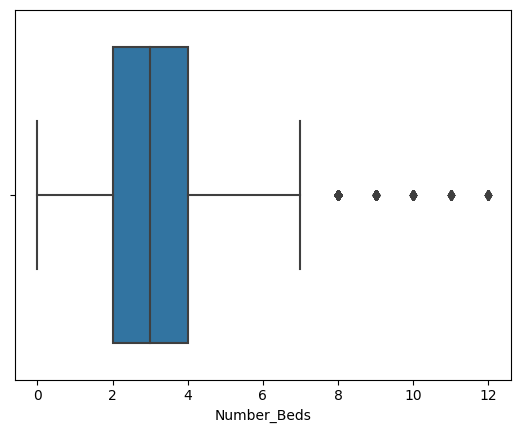

In [23]:
sns.boxplot(data = df, x = "Number_Beds")

In [24]:
df["Number_Beds"].value_counts()

Number_Beds
3     9323
4     7323
2     7225
5     3733
1     2617
6     1487
0      625
7      495
8      240
9       91
10      32
11      17
12      13
Name: count, dtype: int64

In [25]:
df["Number_Baths"].nunique()

14

In [26]:
df["Number_Baths"].value_counts()

Number_Baths
2     11395
3      8407
1      6186
4      4774
5      1086
0       518
6       481
7       173
8       102
9        67
10       15
11        9
12        7
14        1
Name: count, dtype: int64

<Axes: xlabel='Number_Baths', ylabel='Count'>

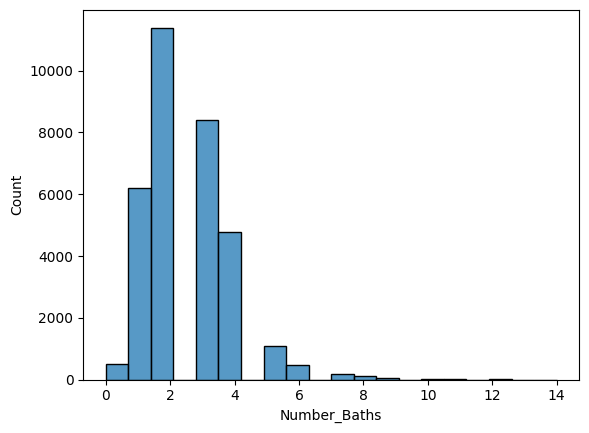

In [27]:
sns.histplot(df["Number_Baths"], bins = 20)


<Axes: xlabel='Number_Baths'>

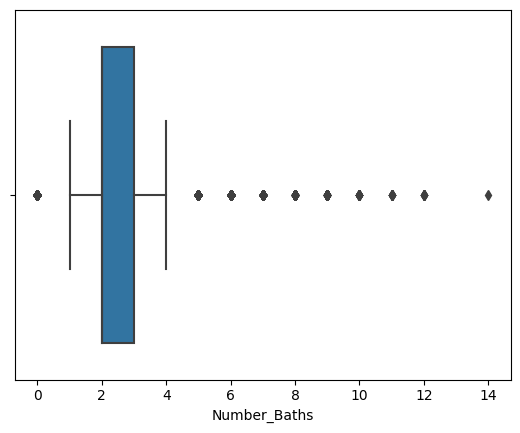

In [28]:
sns.boxplot(data = df, x = "Number_Baths")

In [29]:
df.drop(df[df["Number_Baths"] > 9].index, inplace = True)

<Axes: xlabel='Number_Baths'>

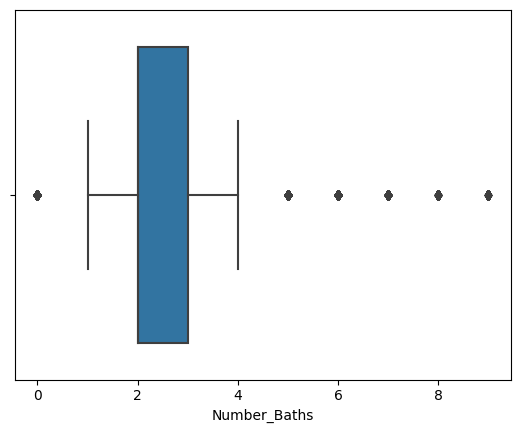

In [30]:
sns.boxplot(data = df, x = "Number_Baths")

In [31]:
df["Number_Baths"].value_counts()

Number_Baths
2    11395
3     8407
1     6186
4     4774
5     1086
0      518
6      481
7      173
8      102
9       67
Name: count, dtype: int64

In [32]:
df["Province"].nunique()

9

In [33]:
df["Province"].value_counts()

Province
Ontario                      13807
British Columbia             11141
Alberta                       3857
Saskatchewan                  1893
Newfoundland and Labrador      654
New Brunswick                  643
Quebec                         580
Manitoba                       523
Nova Scotia                     91
Name: count, dtype: int64

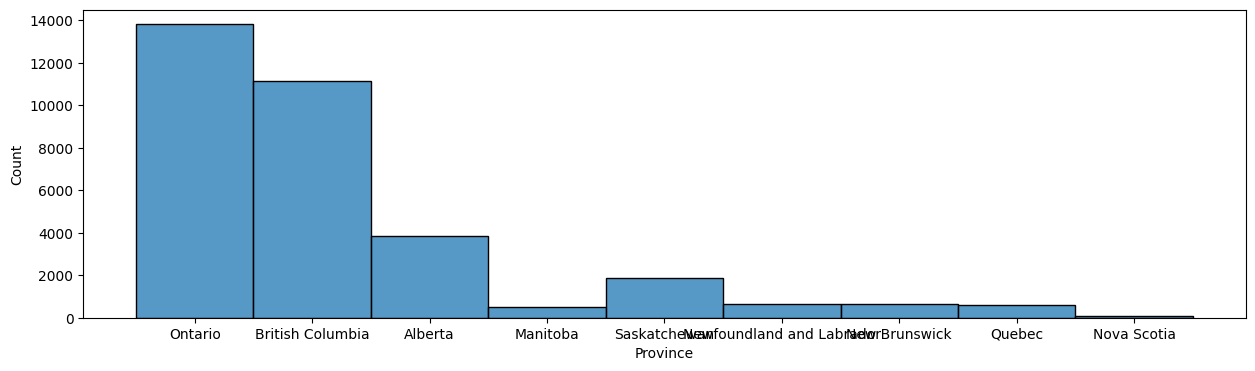

In [34]:
plt.figure(figsize=(15,4))
sns.histplot(df["Province"], bins = 25)
plt.xlim = 9

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
df["City"] = le.fit_transform(df["City"])
df["Province"] = le.fit_transform(df["Province"])

In [38]:
df

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
0,38,779900.0,3,2,6,5647656,97000.0
1,38,799999.0,3,1,6,5647656,97000.0
2,38,799900.0,2,2,6,5647656,97000.0
3,38,1200000.0,4,2,6,5647656,97000.0
4,38,668800.0,1,1,6,5647656,97000.0
...,...,...,...,...,...,...,...
35763,9,439900.0,2,2,5,431479,86753.0
35764,9,6990000.0,5,5,5,431479,86753.0
35765,9,419900.0,2,2,5,431479,86753.0
35766,9,949900.0,3,1,5,431479,86753.0


In [39]:
df["Population"].nunique()

45

In [40]:
df.drop(["Population"], axis = 1 , inplace = True)

In [41]:
df

,City,Price,Number_Beds,Number_Baths,Province,Median_Family_Income
0,38,779900.0,3,2,6,97000.0
1,38,799999.0,3,1,6,97000.0
2,38,799900.0,2,2,6,97000.0
3,38,1200000.0,4,2,6,97000.0
4,38,668800.0,1,1,6,97000.0
...,...,...,...,...,...,...
35763,9,439900.0,2,2,5,86753.0
35764,9,6990000.0,5,5,5,86753.0
35765,9,419900.0,2,2,5,86753.0
35766,9,949900.0,3,1,5,86753.0


In [42]:
df["Median_Family_Income"].nunique()

32

In [43]:
df["Median_Family_Income"].value_counts()

Median_Family_Income
85000.0     4186
97000.0     2704
83000.0     2308
90000.0     2277
82000.0     2037
91000.0     2014
96000.0     1349
73000.0     1329
133000.0    1326
79500.0     1308
100000.0    1303
105000.0    1277
77000.0     1258
92000.0     1149
98000.0     1093
102000.0    1077
89000.0      921
77500.0      678
84000.0      579
87000.0      441
74500.0      414
88000.0      304
79000.0      302
78000.0      277
74000.0      229
110000.0     225
76500.0      195
76000.0      168
80000.0      153
65000.0      151
86753.0       91
62400.0       66
Name: count, dtype: int64

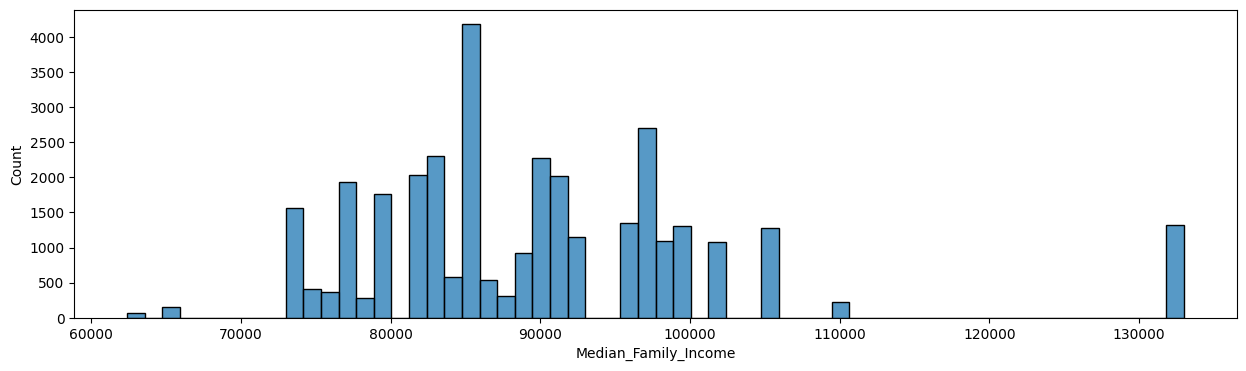

In [44]:
plt.figure(figsize=(15,4))
sns.histplot(df["Median_Family_Income"], bins = 60)
plt.xlim = 32

<Axes: xlabel='Median_Family_Income'>

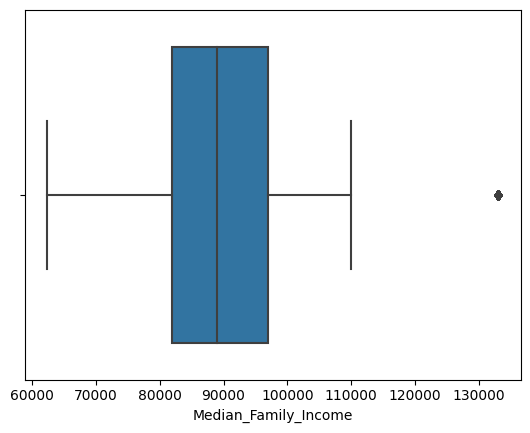

In [45]:
sns.boxplot(data = df, x = "Median_Family_Income")

In [46]:
df["Price"].nunique()

4351

In [47]:
df["Price"].value_counts()

Price
599900.0     398
699900.0     376
799900.0     342
499900.0     337
649900.0     300
            ... 
3699900.0      1
973000.0       1
234999.0       1
162500.0       1
592900.0       1
Name: count, Length: 4351, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

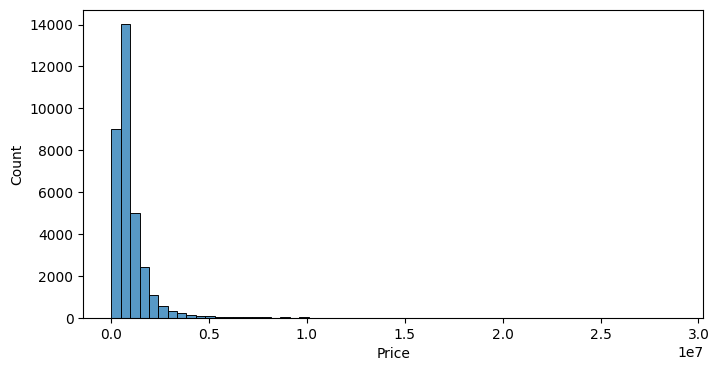

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(df["Price"], bins = 60)

<Axes: xlabel='Price'>

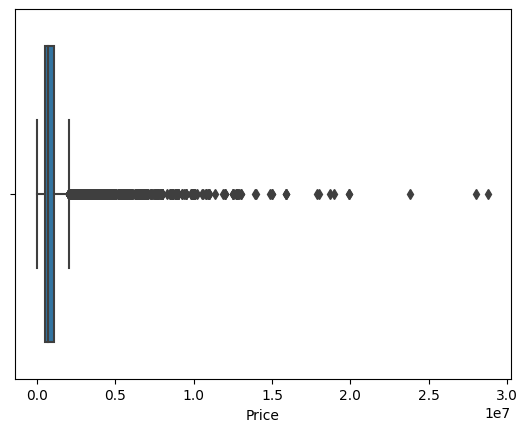

In [49]:
sns.boxplot(data = df, x = df["Price"])

In [50]:
df.sort_values("Price", ascending = False).head(60)

,City,Price,Number_Beds,Number_Baths,Province,Median_Family_Income
25546,42,28800000.0,4,3,1,73000.0
26497,42,27999999.0,5,7,1,73000.0
1818,40,23800000.0,6,9,1,90000.0
1754,40,19880000.0,7,9,1,90000.0
32097,4,19880000.0,7,9,1,83000.0
1704,40,18950000.0,6,8,1,90000.0
25423,42,18700000.0,5,4,1,73000.0
25976,42,17999000.0,3,1,1,73000.0
26478,42,17890000.0,2,1,1,73000.0
27525,17,15900000.0,3,1,1,105000.0


In [51]:
df.drop(df[df["Price"] > 1000000].index, inplace = True)

<Axes: xlabel='Price'>

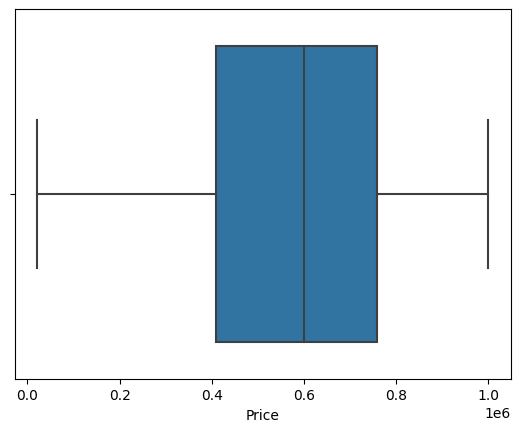

In [52]:
sns.boxplot(data = df, x = df["Price"])

# Train Test Split

In [53]:
x = df.drop(["Price"], axis = 1)
y = df["Price"]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalizasyon

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [61]:
predictions = LinearReg.predict(x_test)
predictions

array([497985.23629215, 557771.9399608 , 517075.16747389, ...,
       452493.72791153, 558608.19132284, 559564.67286516])

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

In [70]:
LinearRegression_MAE


174240.76910450557

In [71]:
LinearRegression_MSE

44041901858.274086

In [72]:
LinearRegression_R2

0.16915157162135674

# kNN Regression

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knnReg = KNeighborsRegressor(n_neighbors=20)
knnReg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [75]:
predictions = knnReg.predict(x_test)
predictions

array([559619.35, 350870.  , 456674.4 , ..., 245125.  , 611080.  ,
       598070.  ])

In [76]:
knnRegression_MAE = mean_absolute_error(y_test, predictions)
knnRegression_MSE = mean_squared_error(y_test, predictions)
knnRegression_R2 = r2_score(y_test, predictions)

In [77]:
knnRegression_MAE

112431.960917245

In [78]:
knnRegression_MSE 

21166987764.33336

In [79]:
knnRegression_R2

0.6006857611621879

# Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfReg =  RandomForestRegressor(n_estimators=150, random_state=42)
rfReg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [82]:
predictions = rfReg.predict(x_test)
predictions

array([552964.47225268, 357068.74599915, 456942.3745404 , ...,
       216211.12788165, 628671.99000722, 595552.96263448])

In [83]:
rfRegression_MAE = mean_absolute_error(y_test, predictions)
rfRegression_MSE = mean_squared_error(y_test, predictions)
rfRegression_R2 = r2_score(y_test, predictions)

In [84]:
rfRegression_MAE

109120.32934625815

In [85]:
rfRegression_MSE

20129441156.224194

In [86]:
rfRegression_R2

0.6202590296257326

# Support Vector Regression

In [87]:
from sklearn.svm import SVR

In [88]:
svr =  SVR(kernel = "linear", C = 20)
svr.fit(x_train, y_train)

SVR(C=20, kernel='linear')

In [89]:
predictions = svr.predict(x_test)
predictions

array([552451.75200585, 589333.17842919, 544175.74769599, ...,
       511786.70836157, 601701.84271617, 566896.31629003])

In [90]:
svr_MAE = mean_absolute_error(y_test, predictions)
svr_MSE = mean_squared_error(y_test, predictions)
svr_R2 = r2_score(y_test, predictions)

In [91]:
svr_MAE 

176249.717825202

In [92]:
svr_MSE

44926786470.116394

In [93]:
svr_R2

0.1524582646108762

# Neural Network Regression

In [94]:
from sklearn.neural_network import MLPRegressor

In [95]:
nnr = MLPRegressor(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
nnr.fit(x_train, y_train)

C:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [96]:
predictions = nnr.predict(x_test)
predictions

array([637687.3044148 , 541883.14565614, 555029.2803555 , ...,
       416824.56770469, 582766.28571086, 553346.40692928])

In [97]:
nnr_MAE = mean_absolute_error(y_test, predictions)
nnr_MSE = mean_squared_error(y_test, predictions)
nnr_R2 = r2_score(y_test, predictions)

In [98]:
nnr_MAE

132603.61711143906

In [99]:
nnr_MSE

27718728095.062614

In [100]:
nnr_R2

0.4770874848105341

# Gradient Regression

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gradientReg = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, random_state=42)
gradientReg.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=150, random_state=42)

In [103]:
predictions = gradientReg.predict(x_test)
predictions

array([555695.06766943, 387880.18520265, 445748.04253201, ...,
       274659.20014313, 628783.89920342, 614649.4388971 ])

In [104]:
gradientReg_MAE = mean_absolute_error(y_test, predictions)
gradientReg_MSE = mean_squared_error(y_test, predictions)
gradientReg_R2 = r2_score(y_test, predictions)

In [105]:
gradientReg_MAE

111214.03762156016

In [106]:
gradientReg_MSE

20197577338.6129

In [107]:
gradientReg_R2

0.618973643716751

# Rapor

In [108]:
a = np.array([[LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2],
              [knnRegression_MAE, knnRegression_MSE, knnRegression_R2],
              [rfRegression_MAE, rfRegression_MSE, rfRegression_R2],
              [svr_MAE, svr_MSE, svr_R2],
              [nnr_MAE, nnr_MSE, nnr_R2],
              [gradientReg_MAE, gradientReg_MSE, gradientReg_R2]])
Report = pd.DataFrame(a,index = ["Linear Regression", "kNN Regression", "Random Forest Regression", "Support Vector Regression",
                                 "Neural Network Regression", "Gradient Regression"],
                      columns = ["Mean Absolute Error", "Mean Squared Error", "R-Squared"])


In [109]:
Report

,Mean Absolute Error,Mean Squared Error,R-Squared
Linear Regression,174240.769105,4.404190e+10,0.169152
kNN Regression,112431.960917,2.116699e+10,0.600686
Random Forest Regression,109120.329346,2.012944e+10,0.620259
Support Vector Regression,176249.717825,4.492679e+10,0.152458
Neural Network Regression,132603.617111,2.771873e+10,0.477087
Gradient Regression,111214.037622,2.019758e+10,0.618974
